<a href="https://colab.research.google.com/github/AmiAnurag/accs-case-study/blob/main/case_study_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('/content/ACCS Case Study Data.xlsx')
df.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.300,2,0.0,106.140
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.366,3,0.1,36.036
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.120,4,0.0,29.640
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.865,3,0.5,-26.055
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.670,5,0.1,37.770


In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Total']=df['Sales']*df['Quantity']
df.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit,Total
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.300,2,0.0,106.140,816.600
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.366,3,0.1,36.036,361.098
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.120,4,0.0,29.640,264.480
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.865,3,0.5,-26.055,134.595
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.670,5,0.1,37.770,568.350


In [ ]:
#recency
## Recency
# To calculate recency, we need to find out  **when was the customer's most recent purchase.**.
recency_df=df.groupby(by='Customer Name',as_index=False)['Order Date'].max()
recency_df.columns=['CustomerName','LastPurchaseDate']
recent_date=recency_df.LastPurchaseDate.max()
print(recent_date)
# Calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

recency_df
# recency_df.head(3)

2015-12-31 00:00:00


,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2015-12-15,16
1,Aaron Hawkins,2015-12-19,12
2,Aaron Smayling,2015-12-08,23
3,Adam Bellavance,2015-11-26,35
4,Adam Hart,2015-12-29,2
...,...,...,...
791,Xylona Preis,2015-11-18,43
792,Yana Sorensen,2015-12-27,4
793,Yoseph Carroll,2015-12-27,4
794,Zuschuss Carroll,2015-12-28,3


In [ ]:
#frequency
frequency_df=df.drop_duplicates().groupby(by=['Customer Name'],as_index=False)['Order Date'].count()
frequency_df.columns=['CustomerName','Frequency']
frequency_df

,CustomerName,Frequency
0,Aaron Bergman,89
1,Aaron Hawkins,56
2,Aaron Smayling,60
3,Adam Bellavance,68
4,Adam Hart,84
...,...,...
791,Xylona Preis,61
792,Yana Sorensen,62
793,Yoseph Carroll,56
794,Zuschuss Carroll,85


In [ ]:
#Monetary
monetary_df=df.groupby(by='Customer Name',as_index=False)['Total'].sum()
monetary_df.columns=['CustomerName','Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,120359.56970
1,Aaron Hawkins,102027.89568
2,Aaron Smayling,64406.23580
3,Adam Bellavance,109573.00940
4,Adam Hart,91431.54582


In [ ]:
rf_df=recency_df.merge(frequency_df,on='CustomerName')
rfm_df=rf_df.merge(monetary_df,on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,16,89,120359.56970
1,Aaron Hawkins,12,56,102027.89568
2,Aaron Smayling,23,60,64406.23580
3,Adam Bellavance,35,68,109573.00940
4,Adam Hart,2,84,91431.54582


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,Aaron Bergman,16,89,120359.56970,397.5,770.5,713.0
1,Aaron Hawkins,12,56,102027.89568,486.5,221.5,637.0
2,Aaron Smayling,23,60,64406.23580,298.0,308.0,309.0
3,Adam Bellavance,35,68,109573.00940,173.0,495.0,679.0
4,Adam Hart,2,84,91431.54582,699.0,734.5,569.0


In [ ]:
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,16,89,120359.56970,50.994227,96.796482,96.796482
1,Aaron Hawkins,12,56,102027.89568,62.411802,27.826633,27.826633
2,Aaron Smayling,23,60,64406.23580,38.229634,38.693467,38.693467
3,Adam Bellavance,35,68,109573.00940,22.193714,62.185930,62.185930
4,Adam Hart,2,84,91431.54582,89.672867,92.273869,92.273869


In [ ]:
rfm_df['RFM_Score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
# rfm_df['RFM_Score']*=0.05
rfm_df=rfm_df.round(2)
rfm_df[['CustomerName','RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Bergman,89.93
1,Aaron Hawkins,33.02
2,Aaron Smayling,38.62
3,Adam Bellavance,56.19
4,Adam Hart,91.88
5,Adam Shillingsburg,67.18
6,Adrian Barton,74.43


In [ ]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score'] > 75 ,"High Value Customer",(np.where(rfm_df['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,Aaron Bergman,16,89,120359.57,50.99,96.80,96.80,89.93,High Value Customer
1,Aaron Hawkins,12,56,102027.90,62.41,27.83,27.83,33.02,Low value Customer
2,Aaron Smayling,23,60,64406.24,38.23,38.69,38.69,38.62,Low value Customer
3,Adam Bellavance,35,68,109573.01,22.19,62.19,62.19,56.19,Medium Value Customer
4,Adam Hart,2,84,91431.55,89.67,92.27,92.27,91.88,High Value Customer


In [ ]:
df.head()

In [ ]:
# market, segment , category , region

In [ ]:
plt.pie(rfm_df['Customer_segment'].value_counts().values,autopct='%1.1f%%',labels=rfm_df['Customer_segment'].value_counts().index,radius=2,shadow=True,explode=[0,0.1,0.2],colors=['#ff9999','#66b3ff','#99ff99'])

In [ ]:
rfm_df.to_csv(path_or_buf='rfm.csv')

In [ ]:
df.State.value_counts()

In [ ]:
segment=dict(rfm_df.set_index('CustomerName')['Customer_segment'])

In [ ]:
df['CustomerSegment']=[segment[i] for i in df['Customer Name'] ]
df.head()

In [ ]:
df[df['State']=='Rajasthan'].CustomerSegment.value_counts()

In [ ]:
segment=pd.DataFrame({'State':df.State.unique()})
high=[]
med=[]
low=[]
for i in df.State.unique():
  high.append(df[df['State']==i].CustomerSegment.value_counts()['High Value Customer'])
  med.append(df[df['State']==i].CustomerSegment.value_counts()['Medium Value Customer'])
  low.append(df[df['State']==i].CustomerSegment.value_counts()['Low value Customer'])
segment['High Value Customer']=high
segment['Medium Value Customer']=med
segment['Low Value Customer']=low
segment

In [ ]:
segment.to_csv(path_or_buf='State wise Customer sentiments.csv')

In [ ]:
f=plt.figure()
f.set_figwidth(50)
f.set_figheight(20)
plt.bar(segment.State,segment['High Value Customer'])

In [ ]:
from bokeh.io import output_file, show,output_notebook
from bokeh.plotting import figure

output_file("stacked.html")
output_notebook()

colors = ["#47669e", "#718dbf","#c9d9d3"]


p = figure(x_range=list(segment.State), title="Customer Value analysis state wise",plot_width=1200,plot_height=500)

p.vbar_stack(list(segment.columns[1:]), x='State', width=0.9, color=colors, source=segment,legend_label=list(segment.columns[1:]))

# p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = 'vertical'

show(p)

In [ ]:
df

In [ ]:
category=pd.DataFrame(df.groupby(['Category'])['Profit'].sum())
category

In [ ]:
plt.pie(category,labels=category.index,shadow=True,autopct='%.2f%%',explode=[0.1,0,0.1],colors=['#827ef7','#aef090','#f7ab54'] )
plt.show()

In [ ]:
category_customerseg=pd.DataFrame(df.groupby(['Category'])['CustomerSegment'].value_counts())
category_customerseg

In [ ]:
colors=['#ec8ef5','#dd64e8','#12cdfc']
plt.pie(category_customerseg.loc['Furniture'],labels=category_customerseg.loc['Furniture'].index,shadow=True,explode=[-0.04,0,0.05],autopct='%.2f',colors=colors)
plt.show()
plt.pie(category_customerseg.loc['Technology'],labels=category_customerseg.loc['Technology'].index,shadow=True,explode=[-0.04,0,0.05],autopct='%.2f',colors=colors)
plt.show()
plt.pie(category_customerseg.loc['Office Supplies'],labels=category_customerseg.loc['Office Supplies'].index,shadow=True,explode=[-0.04,0,0.05],autopct='%.2f',colors=colors)
plt.show()

In [ ]:
category_sub=pd.DataFrame(df.groupby(['Category'])['Sub-Category'].value_counts())

In [ ]:
category_sub.loc['Furniture']['Sub-Category'].values

In [ ]:
plt.pie(category_sub.loc['Furniture']['Sub-Category'].values,labels=category_sub.loc['Furniture'].index,autopct='%.1f%%',explode=[0.1,0,0,0],shadow=True,colors=['#2b24e3','#5953f5','#716dfc','#827ef7'])
plt.title('Sale of Sub-category of Furniture')
plt.show()
plt.pie(category_sub.loc['Technology']['Sub-Category'].values,labels=category_sub.loc['Technology'].index,autopct='%.1f%%',explode=[0.1,0,0,0],shadow=True,colors=['#e08b28','#f09a37','#faa748','#f7ab54'])
plt.title('Sale of Sub-category of Technology')
plt.show()
f=plt.figure()
f.set_figwidth(20)
plt.pie(category_sub.loc['Office Supplies']['Sub-Category'].values,labels=category_sub.loc['Office Supplies'].index,autopct='%.1f%%',explode=[0.1,0,0,0,0,0,0,0,0],shadow=True,colors=['#4ab818','#5acc25','#65d631','#74e041','#80f24b','#90fa5f','#9ffc74','#a8f783','#aef090'])
plt.title('Sale of Sub-category of Office Supplies')
plt.show()

In [ ]:
category_state=pd.DataFrame(df.groupby(['State'])['Category'].value_counts())
# category_state.loc['Andhra Pradesh'].index
category_state.head(6)

In [ ]:
offs=[]
fur=[]
tech=[]
for i in range(0,len(category_state.values),3):
  offs.append(category_state.values[i][0])
  fur.append(category_state.values[i+1][0])
  tech.append(category_state.values[i+2][0])

In [ ]:
f=plt.figure()
f.set_figwidth(20)
plt.bar(segment.State,offs)
plt.bar(segment.State,fur,bottom=offs)
plt.bar(segment.State,tech,bottom=np.array(fur)+np.array(offs))
plt.xlabel('States')
plt.ylabel('Order Frequency')
plt.legend(['Office Supplies','Furniture','Technology'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
data=pd.DataFrame({'ds':pd.to_datetime(df['Order Date']),'y':df.Sales*df.Quantity})


In [ ]:
f=plt.figure()
f.set_figwidth(20)
movingavereage=data['y'].rolling(window=1000).mean()
plt.plot(data.ds,movingavereage)

In [ ]:
delivery=pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])
order_df=pd.DataFrame({'Delivery Duration':delivery,'State':df.State,'Segment':df['CustomerSegment']})
order_df.head()

In [ ]:
order_df[order_df['Segment']=='High Value Customer']['Delivery Duration'].mode()

In [ ]:
order_df[order_df['Segment']=='Medium Value Customer']['Delivery Duration'].mode()

In [ ]:
order_df[order_df['Segment']=='Low value Customer']['Delivery Duration'].mode()

In [ ]:
for i in order_df.State.unique():
  print(i,order_df[order_df['State']==i]['Delivery Duration'].median())

In [ ]:
for i in order_df.iloc[50000:,:].State.unique():
  print(i,order_df[order_df['State']==i]['Delivery Duration'].median())

In [ ]:
order_df[order_df['State']=='Rajasthan']['Delivery Duration'][:10].mean()

In [ ]:
order_df[order_df['State']=='Rajasthan']['Delivery Duration']

In [ ]:
df.head()

In [ ]:
stt=[]
for i in df.State.unique():
  stt.append(df[df['State']==i]['Profit'].sum()/df[df['State']=='Rajasthan']['Sales'].sum())

In [ ]:
f=plt.figure()
f.set_figwidth(20)
plt.bar(df.State.unique(),np.array(stt)*100,color='#1f2151')
plt.xlabel('State')
plt.ylabel('Profit%')
plt.xticks(rotation=90)
plt.show()

In [ ]:
stt2=[]
for i in df.State.unique():
  stt2.append(df[df['State']==i]['Quantity'].sum())

In [ ]:
f=plt.figure()
f.set_figwidth(20)
plt.bar(df.State.unique(),np.array(stt2),color='#1f2151')
plt.xlabel('State')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.pie(df.groupby(['CustomerSegment'])['Discount'].sum(),autopct='%.f%%',explode=[0,0.03,0],colors=['#fa64e8','#c72ab5','#e041ce'],labels=df.groupby(['CustomerSegment'])['Discount'].sum().index)
plt.title('Investments on providing discounts to Customers')
plt.show()

In [ ]:
df.groupby(['CustomerSegment'])['Discount'].sum().index

# RFM Analysis

In [ ]:
#importing neccesary libraries
import pandas as pd
import datetime as dt
import numpy as np

#importing the data
df=pd.read_excel('/content/ACCS Case Study Data.xlsx')
df.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.300,2,0.0,106.140
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.366,3,0.1,36.036
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.120,4,0.0,29.640
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.865,3,0.5,-26.055
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.670,5,0.1,37.770


In [ ]:
df_recency=df.groupby(by='Customer Name',as_index=False)['Order Date'].max()
df_recency.columns=['CustomerName' , 'LastPurchaseDate' ]
recent_date=df_recency['LastPurchaseDate'].max()
print(recent_date)
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

2015-12-31 00:00:00


,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2015-12-15,16
1,Aaron Hawkins,2015-12-19,12
2,Aaron Smayling,2015-12-08,23
3,Adam Bellavance,2015-11-26,35
4,Adam Hart,2015-12-29,2


In [ ]:
frequency_df=df.drop_duplicates().groupby(by=['Customer Name'],as_index=False)['Order Date'].count()
frequency_df.columns=['CustomerName','Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,89
1,Aaron Hawkins,56
2,Aaron Smayling,60
3,Adam Bellavance,68
4,Adam Hart,84


In [ ]:
df['Total']=df['Sales']*df['Quantity']
monetary_df=df.groupby(by='Customer Name',as_index=False)['Total'].sum()
monetary_df.columns=['CustomerName','Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,120359.56970
1,Aaron Hawkins,102027.89568
2,Aaron Smayling,64406.23580
3,Adam Bellavance,109573.00940
4,Adam Hart,91431.54582


In [ ]:
rf_df=df_recency.merge(frequency_df,on='CustomerName')
rfm_df=rf_df.merge(monetary_df,on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,16,89,120359.56970
1,Aaron Hawkins,12,56,102027.89568
2,Aaron Smayling,23,60,64406.23580
3,Adam Bellavance,35,68,109573.00940
4,Adam Hart,2,84,91431.54582


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

#normalizing the rank of the customers
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,16,89,120359.56970,50.994227,96.796482,96.796482
1,Aaron Hawkins,12,56,102027.89568,62.411802,27.826633,27.826633
2,Aaron Smayling,23,60,64406.23580,38.229634,38.693467,38.693467
3,Adam Bellavance,35,68,109573.00940,22.193714,62.185930,62.185930
4,Adam Hart,2,84,91431.54582,89.672867,92.273869,92.273869


In [ ]:
rfm_df['RFM_Score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score']*=0.05
rfm_df=rfm_df.round(2)
rfm_df[['CustomerName','RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Bergman,4.50
1,Aaron Hawkins,1.65
2,Aaron Smayling,1.93
3,Adam Bellavance,2.81
4,Adam Hart,4.59
5,Adam Shillingsburg,3.36
6,Adrian Barton,3.72


In [ ]:
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score'] > 4.5 ,"Top Customers",(np.where(rfm_df['RFM_Score'] >4 , "High value Customer" ,(np.where(rfm_df['RFM_Score']>3,"Medium Value Customer",np.where(rfm_df['RFM_Score']>1.6,'Low Value Customers','Lost Customers'))))))
rfm_df[['CustomerName','RFM_Score','Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Aaron Bergman,4.50,High value Customer
1,Aaron Hawkins,1.65,Low Value Customers
2,Aaron Smayling,1.93,Low Value Customers
3,Adam Bellavance,2.81,Low Value Customers
4,Adam Hart,4.59,Top Customers
5,Adam Shillingsburg,3.36,Medium Value Customer
6,Adrian Barton,3.72,Medium Value Customer
7,Adrian Hane,1.25,Lost Customers
8,Adrian Shami,0.39,Lost Customers
9,Aimee Bixby,1.21,Lost Customers


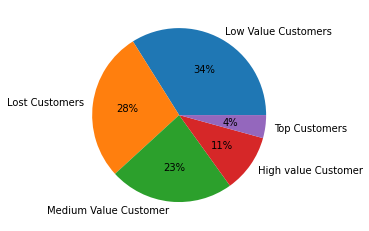

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()